In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
df=pd.read_csv('Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [109]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [110]:
col=['id','Unnamed: 32']
df=df.drop(col,axis=1)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [112]:
from sklearn.preprocessing import LabelEncoder

le =LabelEncoder()
y=le.fit_transform(y)

GEtting important features

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.20,random_state=42)

rf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=20,min_samples_leaf=2,min_samples_split=5)

rf.fit(X1_train,y1_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=2,
                       min_samples_split=5)

In [114]:
from sklearn.metrics import confusion_matrix,accuracy_score

y1_pred=rf.predict(X1_test)

print(confusion_matrix(y1_pred,y1_test))
print(accuracy_score(y1_pred,y1_test))

[[70  3]
 [ 1 40]]
0.9649122807017544


In [115]:
importance=rf.feature_importances_

feature_imp=pd.DataFrame({
    "features": x.columns,
    "importance" :importance
}).sort_values("importance",ascending=False)

print(feature_imp)

                   features  importance
22          perimeter_worst    0.124363
23               area_worst    0.120067
7       concave points_mean    0.114162
27     concave points_worst    0.096873
20             radius_worst    0.078035
2            perimeter_mean    0.048323
26          concavity_worst    0.047918
3                 area_mean    0.047740
13                  area_se    0.042226
6            concavity_mean    0.041563
0               radius_mean    0.040104
21            texture_worst    0.033312
1              texture_mean    0.019856
28           symmetry_worst    0.017309
25        compactness_worst    0.016852
24         smoothness_worst    0.015071
10                radius_se    0.014624
29  fractal_dimension_worst    0.009448
12             perimeter_se    0.009075
4           smoothness_mean    0.008940
17        concave points_se    0.007183
5          compactness_mean    0.007141
15           compactness_se    0.006527
9    fractal_dimension_mean    0.005840


In [116]:
feature_imp.head()

,features,importance
22,perimeter_worst,0.124363
23,area_worst,0.120067
7,concave points_mean,0.114162
27,concave points_worst,0.096873
20,radius_worst,0.078035


In [117]:
from sklearn.preprocessing import MinMaxScaler

scale=MinMaxScaler()
scaled =scale.fit_transform(x)

df=pd.DataFrame(scaled,columns=x.columns)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


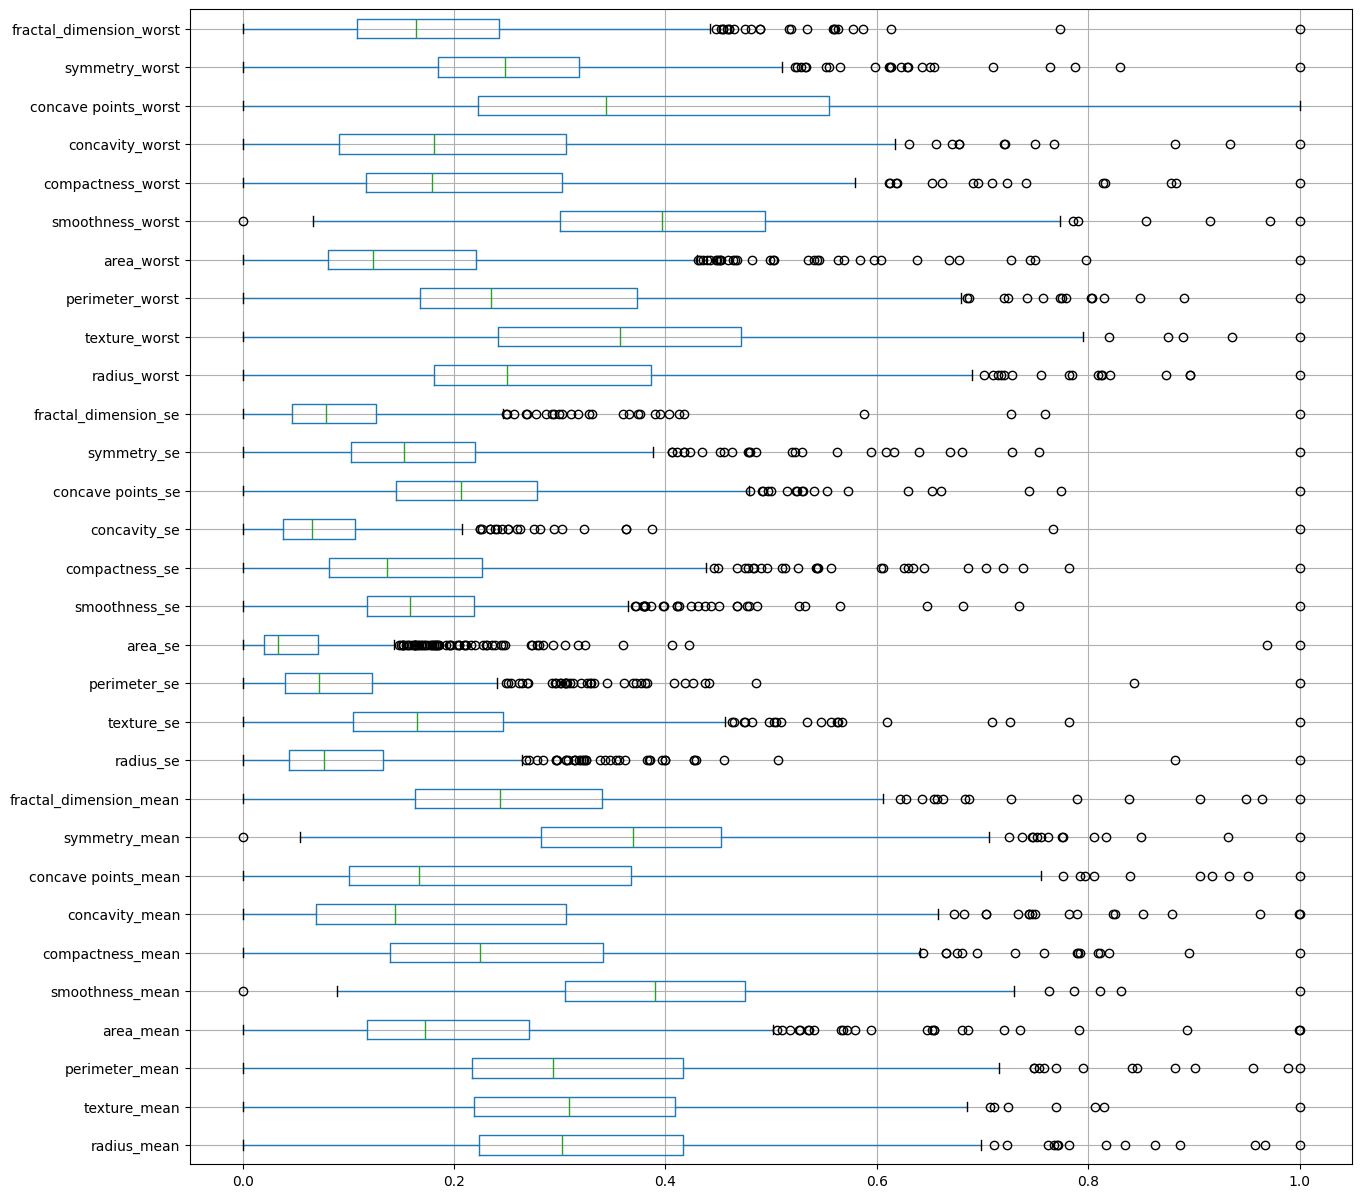

In [118]:
plt.figure(figsize=(15,15))
df.select_dtypes(include="number").boxplot(vert=False)
plt.show()

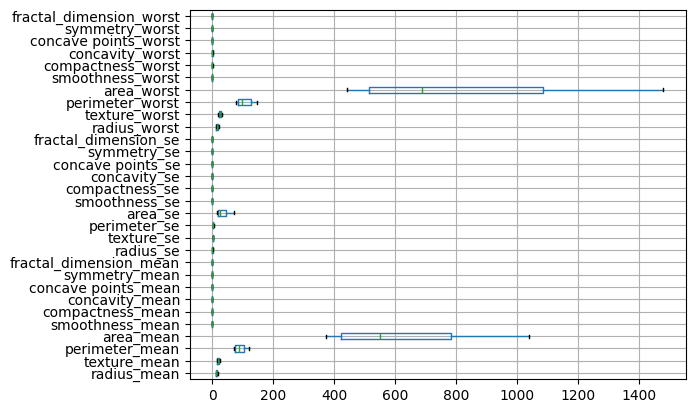

In [119]:
from scipy.stats.mstats import winsorize

for i in x.columns:
    x[i]=winsorize(x[i],limits=[0.15,0.15])

x.select_dtypes(include="number").boxplot(vert=False)
plt.show()

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

knn=KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [121]:
y_pred=knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[64  3]
 [ 3 44]]


In [122]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [123]:
results = {}

for k in [5,10,15,20,25]:
    # Select top k features
    top_features = feature_imp.head(k)["features"].tolist()
    X_features = x[top_features].copy()  # VERY IMPORTANT
    
    # Winsorize BEFORE scaling
    for col in X_features.columns:
        X_features.loc[:, col] = winsorize(X_features[col], limits=[0.15,0.15])
    
    # Scale
    scale = MinMaxScaler()
    X_scaled = scale.fit_transform(X_features)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.20, random_state=42
    )

    # KNN
    knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform')
    knn.fit(X_train, y_train)

    # Predict
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_pred, y_test)

    # Save results
    results[k] = acc
    print(f"Top {k} features → Accuracy = {acc:.4f}")


Top 5 features → Accuracy = 0.9649
Top 10 features → Accuracy = 0.9737
Top 15 features → Accuracy = 0.9561
Top 20 features → Accuracy = 0.9649
Top 25 features → Accuracy = 0.9649
